In [6]:
import warnings
warnings.filterwarnings('ignore')

import cv2
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import rcParams
import matplotlib.pyplot as plt
%matplotlib inline

print('numpy version : ',np.__version__)
print('pandas version : ',pd.__version__)
print('seaborn version : ',sns.__version__)

from mpl_toolkits.mplot3d import Axes3D

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA 
from sklearn.preprocessing import StandardScaler, MinMaxScaler

numpy version :  1.20.3
pandas version :  1.3.4
seaborn version :  0.11.2


In [2]:
print('Numpy Version:', np.__version__)
print('Pandas Version:', pd.__version__)
print('Seaborn Version:', sns.__version__)

Numpy Version: 1.20.3
Pandas Version: 1.3.4
Seaborn Version: 0.11.2


In [3]:
rcParams['figure.figsize'] = 12, 4
rcParams['lines.linewidth'] = 3
rcParams['xtick.labelsize'] = 'x-large'
rcParams['ytick.labelsize'] = 'x-large'

In [7]:
df = pd.read_csv('../flight.csv')
df1 = pd.read_csv('../flight.csv')

# 1. Lakukan EDA pada dataset untuk mendapatkan pemahaman umum mengenai data dan memandu proses feature engineering

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62988 entries, 0 to 62987
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MEMBER_NO          62988 non-null  int64  
 1   FFP_DATE           62988 non-null  object 
 2   FIRST_FLIGHT_DATE  62988 non-null  object 
 3   GENDER             62985 non-null  object 
 4   FFP_TIER           62988 non-null  int64  
 5   WORK_CITY          60719 non-null  object 
 6   WORK_PROVINCE      59740 non-null  object 
 7   WORK_COUNTRY       62962 non-null  object 
 8   AGE                62568 non-null  float64
 9   LOAD_TIME          62988 non-null  object 
 10  FLIGHT_COUNT       62988 non-null  int64  
 11  BP_SUM             62988 non-null  int64  
 12  SUM_YR_1           62437 non-null  float64
 13  SUM_YR_2           62850 non-null  float64
 14  SEG_KM_SUM         62988 non-null  int64  
 15  LAST_FLIGHT_DATE   62988 non-null  object 
 16  LAST_TO_END        629

In [6]:
df.head()

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,...,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
0,54993,11/2/2006,12/24/2008,Male,6,.,beijing,CN,31.0,3/31/2014,...,234188.0,580717,3/31/2014,1,3.483254,18,34,0.961639,619760,50
1,28065,2/19/2007,8/3/2007,Male,6,NaN,beijing,CN,42.0,3/31/2014,...,167434.0,293678,3/25/2014,7,5.194245,17,29,1.252314,415768,33
2,55106,2/1/2007,8/30/2007,Male,6,.,beijing,CN,40.0,3/31/2014,...,164982.0,283712,3/21/2014,11,5.298507,18,20,1.254676,406361,26
3,21189,8/22/2008,8/23/2008,Male,5,Los Angeles,CA,US,64.0,3/31/2014,...,125500.0,281336,12/26/2013,97,27.863636,73,11,1.090870,372204,12
4,39546,4/10/2009,4/15/2009,Male,6,guiyang,guizhou,CN,48.0,3/31/2014,...,130702.0,309928,3/27/2014,5,4.788079,47,27,0.970658,338813,39


In [7]:
df.isnull().sum()

MEMBER_NO               0
FFP_DATE                0
FIRST_FLIGHT_DATE       0
GENDER                  3
FFP_TIER                0
WORK_CITY            2269
WORK_PROVINCE        3248
WORK_COUNTRY           26
AGE                   420
LOAD_TIME               0
FLIGHT_COUNT            0
BP_SUM                  0
SUM_YR_1              551
SUM_YR_2              138
SEG_KM_SUM              0
LAST_FLIGHT_DATE        0
LAST_TO_END             0
AVG_INTERVAL            0
MAX_INTERVAL            0
EXCHANGE_COUNT          0
avg_discount            0
Points_Sum              0
Point_NotFlight         0
dtype: int64

In [9]:
df[df.duplicated()==True]

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,...,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight


In [8]:
# pengelompokan kolom berdasarkan jenisnya
nums = ['MEMBER_NO', 'FLIGHT_COUNT', 'FFP_TIER','AGE','BP_SUM', 'SUM_YR_1', 'SUM_YR_2','SEG_KM_SUM','LAST_TO_END',
        'AVG_INTERVAL','MAX_INTERVAL','EXCHANGE_COUNT','avg_discount','Points_Sum','Point_NotFlight']
cats = ['FFP_DATE', 'FIRST_FLIGHT_DATE',  'LOAD_TIME','GENDER', 'WORK_CITY', 'WORK_PROVINCE','WORK_COUNTRY','LAST_FLIGHT_DATE']

In [11]:
df[nums].describe()

,MEMBER_NO,FLIGHT_COUNT,FFP_TIER,AGE,BP_SUM,SUM_YR_1,SUM_YR_2,SEG_KM_SUM,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
count,62988.000000,62988.000000,62988.000000,62568.000000,62988.000000,62437.000000,62850.000000,62988.000000,62988.000000,62988.000000,62988.000000,62988.000000,62988.000000,62988.0000,62988.000000
mean,31494.500000,11.839414,4.102162,42.476346,10925.081254,5355.376064,5604.026014,17123.878691,176.120102,67.749788,166.033895,0.319775,0.721558,12545.7771,2.728155
std,18183.213715,14.049471,0.373856,9.885915,16339.486151,8109.450147,8703.364247,20960.844623,183.822223,77.517866,123.397180,1.136004,0.185427,20507.8167,7.364164
min,1.000000,2.000000,4.000000,6.000000,0.000000,0.000000,0.000000,368.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000
25%,15747.750000,3.000000,4.000000,35.000000,2518.000000,1003.000000,780.000000,4747.000000,29.000000,23.370370,79.000000,0.000000,0.611997,2775.0000,0.000000
50%,31494.500000,7.000000,4.000000,41.000000,5700.000000,2800.000000,2773.000000,9994.000000,108.000000,44.666667,143.000000,0.000000,0.711856,6328.5000,0.000000
75%,47241.250000,15.000000,4.000000,48.000000,12831.000000,6574.000000,6845.750000,21271.250000,268.000000,82.000000,228.000000,0.000000,0.809476,14302.5000,1.000000
max,62988.000000,213.000000,6.000000,110.000000,505308.000000,239560.000000,234188.000000,580717.000000,731.000000,728.000000,728.000000,46.000000,1.500000,985572.0000,140.000000


In [12]:
df[cats].describe()

,FFP_DATE,FIRST_FLIGHT_DATE,LOAD_TIME,GENDER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,LAST_FLIGHT_DATE
count,62988,62988,62988,62985,60719,59740,62962,62988
unique,3068,3406,1,2,3234,1165,118,731
top,1/13/2011,2/16/2013,3/31/2014,Male,guangzhou,guangdong,CN,3/31/2014
freq,184,96,62988,48134,9386,17509,57748,959


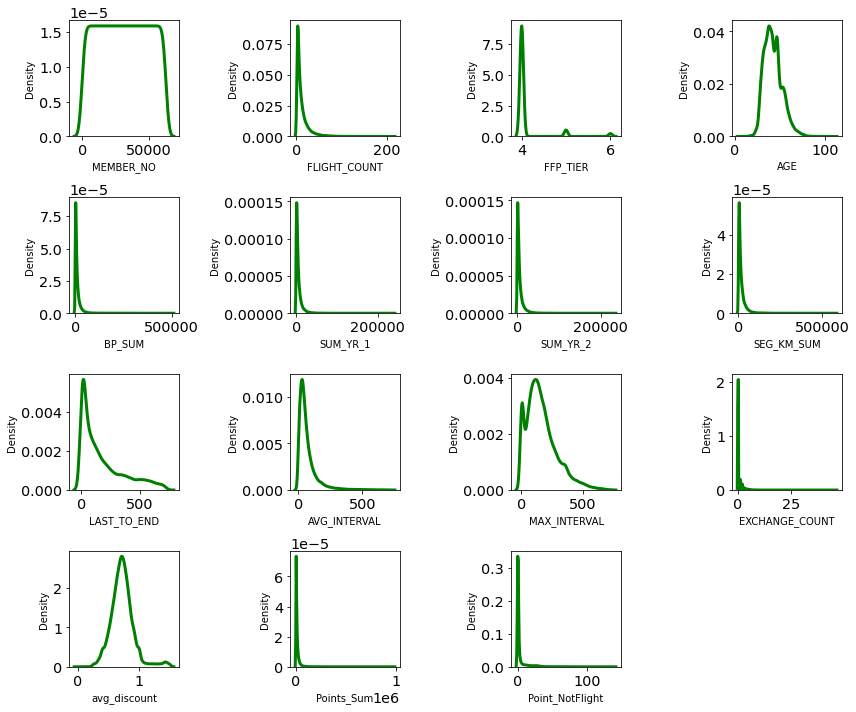

In [13]:
features = nums
plt.figure(figsize=(12, 10))
for i in range(0, len(nums)):
    plt.subplot(4, 4, i+1)
    sns.kdeplot(x=df[features[i]], color='green')
    plt.xlabel(features[i])
    plt.tight_layout()

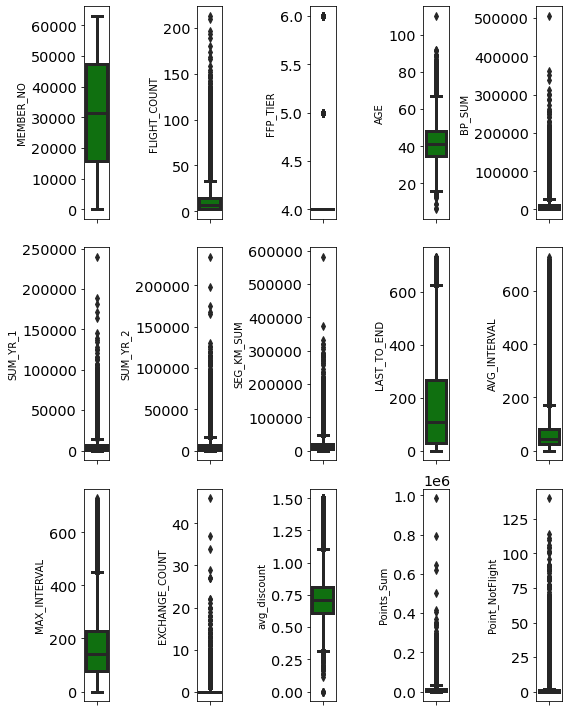

In [14]:
features = nums
plt.figure(figsize=(8, 10))
for i in range(0, len(features)):
    plt.subplot(3, 5, i+1)
    sns.boxplot(y=df[features[i]], color='green', orient='v')
    plt.tight_layout()

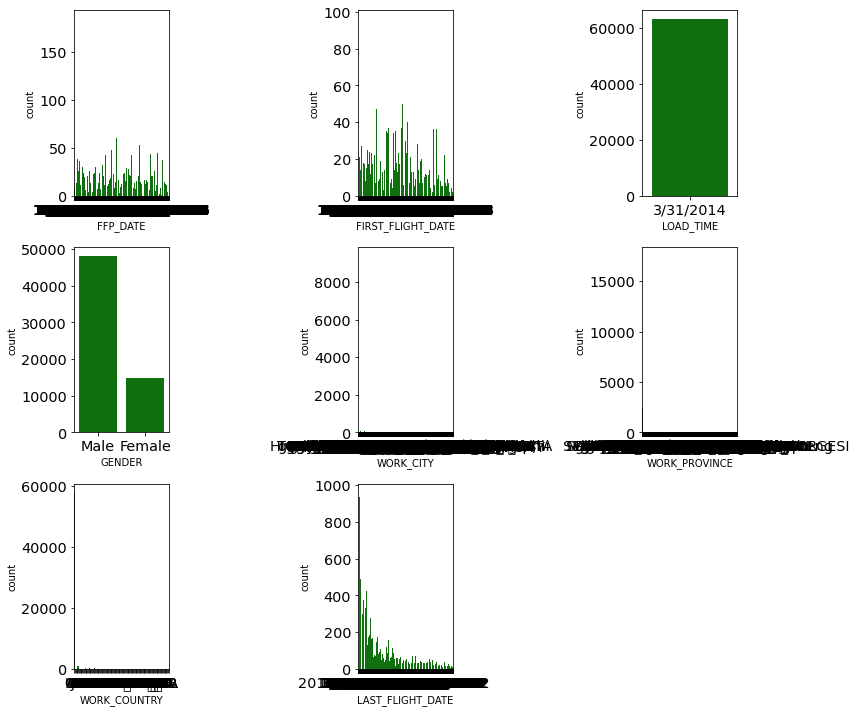

In [15]:
plt.figure(figsize=(12, 10))
for i in range(0, len(cats)):
    plt.subplot(3, 3, i+1)
    sns.countplot(x = df[cats[i]], color='green', orient='v')
    plt.tight_layout()

In [16]:
for col in cats:
    print(f'''Value count kolom {col}:''')
    print(df[col].value_counts())
    print()

Value count kolom FFP_DATE:
1/13/2011     184
1/1/2013      165
3/1/2013      100
11/17/2010     99
1/14/2011      95
             ... 
10/4/2005       1
5/18/2009       1
11/29/2004      1
11/7/2004       1
5/19/2009       1
Name: FFP_DATE, Length: 3068, dtype: int64

Value count kolom FIRST_FLIGHT_DATE:
2/16/2013    96
9/30/2012    85
2/15/2013    84
9/9/2005     78
4/21/2012    70
             ..
3/2/2005      1
4/12/2009     1
2/20/2005     1
1/27/2005     1
12/7/2004     1
Name: FIRST_FLIGHT_DATE, Length: 3406, dtype: int64

Value count kolom LOAD_TIME:
3/31/2014    62988
Name: LOAD_TIME, dtype: int64

Value count kolom GENDER:
Male      48134
Female    14851
Name: GENDER, dtype: int64

Value count kolom WORK_CITY:
guangzhou    9386
beijing      7845
shanghai     5001
shenzhen     3605
dalian       1979
             ... 
KASUGAI         1
hainan          1
xinxishi        1
KA              1
lingshui        1
Name: WORK_CITY, Length: 3234, dtype: int64

Value count kolom WORK_PROV

In [17]:
df.corr()

,MEMBER_NO,FFP_TIER,AGE,FLIGHT_COUNT,BP_SUM,SUM_YR_1,SUM_YR_2,SEG_KM_SUM,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
MEMBER_NO,1.000000,-0.005910,0.001259,-0.000276,0.000063,-0.002529,0.001185,-0.000032,-0.002588,0.002479,0.004761,-0.003844,0.001727,-0.003613,-0.033204
FFP_TIER,-0.005910,1.000000,0.078654,0.582447,0.581085,0.463122,0.611385,0.522350,-0.206313,-0.144928,-0.127641,0.342355,0.248845,0.559249,0.192803
AGE,0.001259,0.078654,1.000000,0.073246,0.100501,0.111815,0.083743,0.087254,-0.025600,-0.024613,0.009382,0.029604,0.133235,0.074757,-0.092282
FLIGHT_COUNT,-0.000276,0.582447,0.073246,1.000000,0.788379,0.748032,0.794838,0.850411,-0.404999,-0.316833,-0.188682,0.502501,0.139377,0.747092,0.291880
BP_SUM,0.000063,0.581085,0.100501,0.788379,1.000000,0.850624,0.884632,0.921724,-0.319039,-0.246764,-0.147953,0.530021,0.307245,0.923271,0.244254
SUM_YR_1,-0.002529,0.463122,0.111815,0.748032,0.850624,1.000000,0.663009,0.804125,-0.186173,-0.243309,-0.145206,0.488029,0.268884,0.788354,0.235095
SUM_YR_2,0.001185,0.611385,0.083743,0.794838,0.884632,0.663009,1.000000,0.849195,-0.423420,-0.246290,-0.154905,0.468149,0.234652,0.826666,0.237954
SEG_KM_SUM,-0.000032,0.522350,0.087254,0.850411,0.921724,0.804125,0.849195,1.000000,-0.369509,-0.280746,-0.155508,0.507819,0.108393,0.853014,0.259037
LAST_TO_END,-0.002588,-0.206313,-0.025600,-0.404999,-0.319039,-0.186173,-0.423420,-0.369509,1.000000,-0.108594,-0.343939,-0.169717,-0.021036,-0.292027,-0.124074
AVG_INTERVAL,0.002479,-0.144928,-0.024613,-0.316833,-0.246764,-0.243309,-0.246290,-0.280746,-0.108594,1.000000,0.724392,-0.130226,-0.038814,-0.220946,-0.075967


<AxesSubplot:>

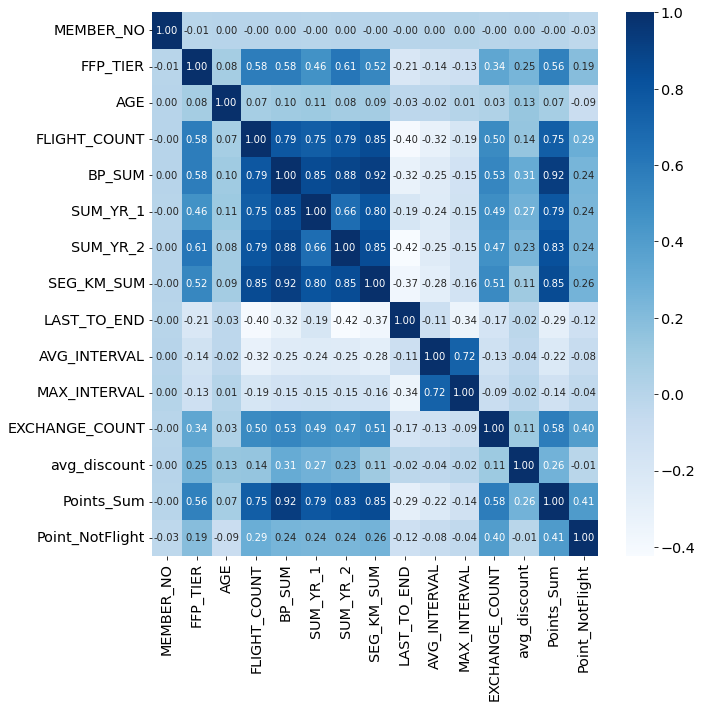

In [18]:
# correlation heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), cmap='Blues', annot=True, fmt='.2f')

### Hasil Pengamatan

- Tipe data 'FFP_DATE', 'FIRST_FLIGHT_DATE','LOAD_TIME','LAST_FLIGHT_DATE' perlu diubah menjadi datetime

- terdapat data kosong di kolom : WORK_CITY sejumlah 2269, WORK_PROVINCE sejumlah 3248, WORK_COUNTRY sejumlah 26, AGE sejumlah 420, SUM_YR_1 sejumlah 551, dan kolom SUM_YR_2 sejumlah 138.

- kolom AGE dan AVG discount memiliki distribusi yang cenderung normal, sedangkan kolom numerik lainnya berdistribus positively skewed.

- Korelasi antar variabel : kuat jika x > 0.1 atau x < -0.1

  1) FFP_TIER memiliki korelasi kuat dengan kolom Points_Sum, FLIGHT_COUNT, BP_SUM, SUM_YR_2, SUM_YR_1, avg_discount
  
  2) AGE memiliki korelasi kuat dengan kolom avg_discount, BP_SUM, SUM_YR_1
  
  3) FLIGHT_COUNT memiliki korelasi kuat dengan kolom FFP_TIER, BP_SUM, SUM_YR_1, SUM_YR_2, SEG_KM_SUM, LAST_TO_END, AVG_INTERVAL, MAX_INTERVAL, EXCHANGE_COUNT, avg_discount , Points_Sum, Point_NotFlight.
  
  4) BP_SUM  memiliki korelasi kuat dengan kolom dengan semua kolom numerik kecuali dengan kolom MEMBER_NO
  
  5) SUM_YR_1 memiliki korelasi kuat dengan kolom dengan semua kolom numerik kecuali dengan kolom MEMBER_NO
  
  6) SUM_YR_2 memiliki korelasi kuat dengan kolom dengan semua kolom numerik kecuali dengan kolom MEMBER_NO dan kolom AGE
  
  7) SEG_KM_SUM memiliki korelasi kuat dengan kolom dengan semua kolom numerik kecuali dengan kolom MEMBER_NO dan kolom AGE
  
  8) LAST_TO_END memiliki korelasi kuat dengan kolom dengan semua kolom numerik kecuali dengan kolom MEMBER_NO, avg_discount dan kolom AGE
  
  9) AVG_INTERVAL memiliki korelasi kuat dengan kolom dengan semua kolom numerik kecuali dengan kolom MEMBER_NO, avg_discount, Points_Sum, Point_NotFlight dan kolom AGE
  
  10) MAX_INTERVAL memiliki korelasi kuat dengan kolom dengan semua kolom numerik kecuali dengan kolom  MEMBER_NO, avg_discount, Point_NotFlight dan kolom AGE.
  
  11) EXCHANGE_COUNT memiliki korelasi kuat dengan kolom dengan semua kolom numerik kecuali dengan kolom MEMBER_NO, MAX_INTERVAL dan kolom AGE
  
  12) avg_discount memiliki korelasi kuat Points_Sum, EXCHANGE_COUNT, SEG_KM_SUM, LAST_TO_END, AVG_INTERVAL, MAX_INTERVAL, EXCHANGE_COUNT, avg_discount, Points_Sum,Point_NotFlight.
  
  13) Points_Sum memiliki korelasi kuat dengan kolom dengan semua kolom numerik kecuali dengan kolom MEMBER_NO dan kolom AGE.
  
  14) Point_NotFlight memiliki korelasi kuat dengan kolom Points_Sum, EXCHANGE_COUNT, LAST_TO_END, SEG_KM_SUM, SUM_YR_2, SUM_YR_1, BP_SUM, FLIGHT_COUNT, dan FFP_TIER.  
  
- korelasi terkuat dengan nilai korelasi 0.92 yaitu terdapat pada korelasi Points_Sum dengan BP_SUM, dan korelasi SEG_KM_SUM dengan BP_SUM
  

# 2. Pilih fitur-fitur yang menurut teman-teman masuk akal secara bisnis untuk digunakan sebagai fitur clustering. Lakukan feature engineering! 

a. Dari sekian banyak kolom yang ada, tentukan 3-6 fitur untuk digunakan sebagai fitur clustering. Tulis alasan teman-teman memilih fitur tersebut.

b. Lakukan preprocessing dan feature engineering (apabila fitur yang teman-teman pilih merupakan fitur baru yang dihasilkan dari fitur-fitur yang sudah ada).

### Segmentation

Recency: when is the last time the user takes an action ? menggunakan data dari feature LAST_TO_END 

Frequency: how many times does the user take this action? menggunakan data dari feature FLIGHT_COUNT

Monetary value: what is the sum of monetary value from this user throughout his/her lifetime? menggunakan data dari feature SEG_KM_SUM



In [20]:
df['LAST_TO_END'].describe()

count    62988.000000
mean       176.120102
std        183.822223
min          1.000000
25%         29.000000
50%        108.000000
75%        268.000000
max        731.000000
Name: LAST_TO_END, dtype: float64

In [21]:
df['FLIGHT_COUNT'].describe()

count    62988.000000
mean        11.839414
std         14.049471
min          2.000000
25%          3.000000
50%          7.000000
75%         15.000000
max        213.000000
Name: FLIGHT_COUNT, dtype: float64

In [22]:
df['SEG_KM_SUM'].describe()

count     62988.000000
mean      17123.878691
std       20960.844623
min         368.000000
25%        4747.000000
50%        9994.000000
75%       21271.250000
max      580717.000000
Name: SEG_KM_SUM, dtype: float64

### Deskripsi Data

MEMBER_NO-b : Member ID

FFP_DATE : Frequent Flyer Program Join Date

FIRST_FLIGHT_DATE : First flight

GENDER : Gender

FFP_TIER : Tier of Frequent Flyer Program

WORK_CITY : Hometown

WORK_PROVINCE : province of origin

WORK_COUNTRY : country of origin

AGE : Age

LOAD_TIME : ( observation window wnd time ) date data was taken

FLIGHT_COUNT : Number of flights Customer

BP_SUM : Itinerary

SUM_YR_1 : fare revenue 1 (revenue)

SUM_YR_2 : votes price income

SEG_KM_SUM : total distance(km) of flights that have been carried

LAST_FLIGHT_DATE : date of last flight

LAST_TO_END : Time from the last boarding time to the end of the observation window

AVG_INTERVAL : average time interval

MAX_INTERVAL : maximum time interval

EXCHANGE_COUNT : Number of exchanges

avg_discount : average discount obtained

Points_Sum : total points earned by members

Point_NotFlight : points not used by members

In [6]:
# feature drop null
df = df.dropna(subset=['WORK_COUNTRY', 'GENDER'])
df.isna().sum()

MEMBER_NO               0
FFP_DATE                0
FIRST_FLIGHT_DATE       0
GENDER                  0
FFP_TIER                0
WORK_CITY            2244
WORK_PROVINCE        3223
WORK_COUNTRY            0
AGE                   419
LOAD_TIME               0
FLIGHT_COUNT            0
BP_SUM                  0
SUM_YR_1              551
SUM_YR_2              138
SEG_KM_SUM              0
LAST_FLIGHT_DATE        0
LAST_TO_END             0
AVG_INTERVAL            0
MAX_INTERVAL            0
EXCHANGE_COUNT          0
avg_discount            0
Points_Sum              0
Point_NotFlight         0
dtype: int64

Nilai Null pada kolom WORK_COUNTRY dan GENDER kami drop karena jumlah nya relatif kecil dibanding kolom lain

In [9]:
# Impute pake modus
df['WORK_CITY'].fillna(df['WORK_CITY'].mode()[0], inplace=True)
df['WORK_PROVINCE'].fillna(df['WORK_PROVINCE'].mode()[0], inplace=True)
# impute pake median
#df['select_features'].fillna(df['select_features'].median(), inplace=True)
# impute pake mean
df['AGE'].fillna(df['AGE'].mean(), inplace=True)
df['SUM_YR_1'].fillna(df['SUM_YR_1'].mean(), inplace=True)
df['SUM_YR_2'].fillna(df['SUM_YR_2'].mean(), inplace=True)

In [10]:
df.isna().sum()

MEMBER_NO             0
FFP_DATE              0
FIRST_FLIGHT_DATE     0
GENDER                3
FFP_TIER              0
WORK_CITY             0
WORK_PROVINCE         0
WORK_COUNTRY         26
AGE                   0
LOAD_TIME             0
FLIGHT_COUNT          0
BP_SUM                0
SUM_YR_1              0
SUM_YR_2              0
SEG_KM_SUM            0
LAST_FLIGHT_DATE      0
LAST_TO_END           0
AVG_INTERVAL          0
MAX_INTERVAL          0
EXCHANGE_COUNT        0
avg_discount          0
Points_Sum            0
Point_NotFlight       0
dtype: int64

In [11]:
df_selection=df[['LAST_TO_END','FLIGHT_COUNT','SEG_KM_SUM']]

In [12]:
df_selection.columns=['R','F','M']

In [13]:
df_selection.head()

,R,F,M
0,1,210,580717
1,7,140,293678
2,11,135,283712
3,97,23,281336
4,5,152,309928


In [12]:
df_selection.describe()

,R,F,M
count,62959.000000,62959.000000,62959.000000
mean,176.106752,11.840356,17124.918439
std,183.820322,14.051216,20960.704310
min,1.000000,2.000000,368.000000
25%,29.000000,3.000000,4748.500000
50%,107.000000,7.000000,9995.000000
75%,267.000000,15.000000,21272.000000
max,731.000000,213.000000,580717.000000


### Handling Outliers

In [14]:
rfm_outlier=df_selection.copy()

In [15]:
cols=['R','F','M']
for col in cols:
    high_cut = rfm_outlier[col].quantile(q=0.99)
    low_cut=rfm_outlier[col].quantile(q=0.01)
    rfm_outlier.loc[rfm_outlier[col]>high_cut,col]=high_cut
    rfm_outlier.loc[rfm_outlier[col]<low_cut,col]=low_cut

In [16]:
rfm_outlier.shape

(62988, 3)

## Scaling

In [17]:
from sklearn.preprocessing import MinMaxScaler

In [18]:
df_standar=rfm_outlier
scale = MinMaxScaler()
kolom_all = [x for x in df_standar.columns]
for kolom in kolom_all:
  df_standar[kolom] = scale.fit_transform(np.array(df_standar[kolom]).reshape(-1,1))

In [19]:
df_standar.head()

,R,F,M
0,0.000000,1.000000,1.0
1,0.008746,1.000000,1.0
2,0.014577,1.000000,1.0
3,0.139942,0.313433,1.0
4,0.005831,1.000000,1.0


In [20]:
df_standar.describe()

,R,F,M
count,62988.000000,62988.000000,62988.000000
mean,0.255004,0.143686,0.156225
std,0.267182,0.191220,0.186307
min,0.000000,0.000000,0.000000
25%,0.040816,0.014925,0.035694
50%,0.155977,0.074627,0.088348
75%,0.389213,0.194030,0.201515
max,1.000000,1.000000,1.000000


# 3. Lakukan clustering K-means! Temukan jumlah cluster yang menurut teman-teman optimal dan evaluasi cluster yang dihasilkan dengan visualisasi dan silhouette score 

### Evaluasi

#### Inertia

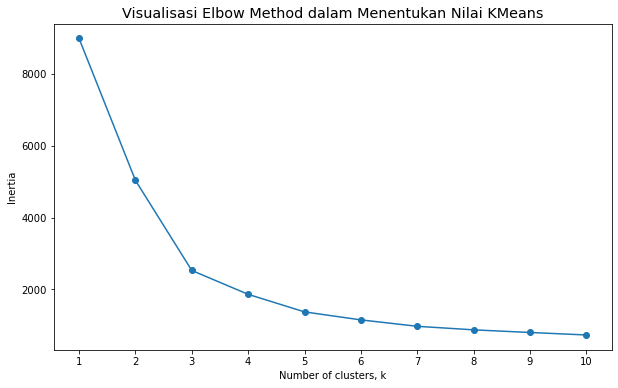

In [21]:
from sklearn.cluster import KMeans
ks = range(1,11)
inertias=[]
for k in ks :
    kc = KMeans(n_clusters=k,random_state=142)
    kc.fit(df_standar)
    cluster = kc.fit_predict(df_standar)
    inertias.append(kc.inertia_)
# Plot ks vs inertias
f, ax = plt.subplots(figsize=(10, 6))
plt.plot(ks, inertias, '-o')
plt.xlabel('Number of clusters, k')
plt.ylabel('Inertia')
plt.xticks(ks)
plt.style.use('ggplot')
plt.title('Visualisasi Elbow Method dalam Menentukan Nilai KMeans')
plt.show()


#### Silhouette score

In [22]:
from sklearn.metrics import silhouette_score

In [23]:
range_n_clusters = list(range(2,11))
print(range_n_clusters)

[2, 3, 4, 5, 6, 7, 8, 9, 10]


In [23]:
for n_clusters in range(2,6):
    clusterer = KMeans(n_clusters=n_clusters,init='k-means++',max_iter=300, random_state=42).fit(df_standar)
    preds = clusterer.predict(df_standar)

    # TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
    score = silhouette_score(df_standar, preds, metric='mahalanobis')
    print ("For n_clusters = {}. The average silhouette_score is : {}".format(n_clusters, score))

For n_clusters = 2. The average silhouette_score is : 0.32330623073562254
For n_clusters = 3. The average silhouette_score is : 0.42628537968338
For n_clusters = 4. The average silhouette_score is : 0.35635838908119843
For n_clusters = 5. The average silhouette_score is : 0.3037138187615938


In [24]:
kc = KMeans(init='k-means++',n_clusters= 4, random_state=42)
kc.fit(df_standar)
cluster_labels = kc.labels_

data = df_standar.assign(K_Cluster = cluster_labels)
data_1=df_selection.assign(K_Cluster = cluster_labels)

In [25]:
data_2=data.groupby('K_Cluster').mean()
data_2['count']=pd.value_counts(data['K_Cluster'])

In [26]:
data_2

,R,F,M,count
K_Cluster,,,,
0,0.164425,0.067014,0.079865,31575
1,0.070009,0.286627,0.295318,13181
2,0.682483,0.030485,0.051285,14391
3,0.032820,0.707570,0.699800,3841


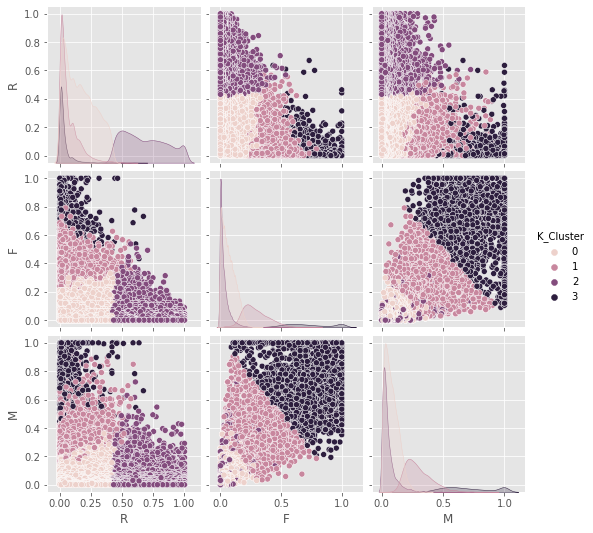

In [27]:
sns.pairplot(data=data, hue='K_Cluster')

PCA

In [28]:
x=data.drop('K_Cluster', axis=1)

Wall time: 614 ms


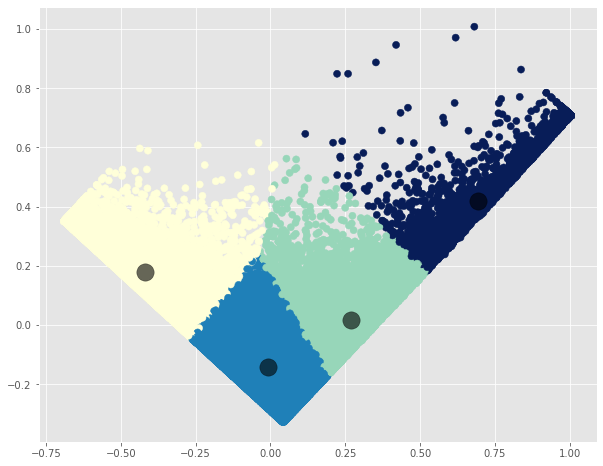

In [29]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
n_clusters = 4
sklearn_pca = PCA(n_components = 2)
Y_sklearn = sklearn_pca.fit_transform(df_standar)
kmeans = KMeans(n_clusters= n_clusters, max_iter=600,random_state=42, algorithm = 'auto')

%time fitted = kmeans.fit(Y_sklearn)
prediction = kmeans.predict(Y_sklearn)
df_pred=df.assign(K_Cluster = prediction)
targets = [0, 1, 2,3]
plt.figure(figsize = (10,8))
plt.scatter(Y_sklearn[:, 0], Y_sklearn[:, 1],c=prediction ,s=50, cmap='YlGnBu')
centers2 = fitted.cluster_centers_
plt.scatter(centers2[:, 0], centers2[:, 1],c='black', s=300, alpha=0.6);

In [30]:
data_labeling=df.assign(K_Cluster = cluster_labels)

In [31]:
cluster = [] #membuat list kosong
for i, k in data_labeling.iterrows(): #iterasi setiap row
    if k['K_Cluster'] == 0:
        cluster_name = 'Potential'
    elif k['K_Cluster'] == 3:
        cluster_name = 'Loyal'
    elif k['K_Cluster'] == 1:
        cluster_name = 'Low Value'
    else:
        cluster_name = 'Important'
    cluster.append(cluster_name)
data_labeling['cluster'] = cluster
    

In [94]:
df_cluster=data_labeling.groupby(data_labeling['cluster']).mean()
df_cluster['count']=pd.value_counts(data_labeling['cluster'])
df_cluster.head()

,MEMBER_NO,FFP_TIER,AGE,FLIGHT_COUNT,BP_SUM,SUM_YR_1,SUM_YR_2,SEG_KM_SUM,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight,K_Cluster,count
cluster,,,,,,,,,,,,,,,,,
Important,31415.288798,4.007659,42.008870,4.039825,3693.256562,3522.553638,370.864629,6291.380909,470.254821,49.719267,88.195920,0.058971,0.714948,4267.929750,1.408202,1.0,14363
Low Value,31132.926714,4.881271,44.285827,53.057000,54946.346204,24980.933543,28435.375624,77160.912530,23.486998,14.906032,82.841345,2.220121,0.793603,64410.943262,9.521933,2.0,3807
Loyal,31660.628260,4.159524,43.602051,21.294494,19398.508083,8937.074233,10448.710538,30757.672716,48.953714,33.136340,148.341467,0.567866,0.742033,21416.837273,3.626354,3.0,13114
Potential,31511.052849,4.027656,41.997258,6.509519,5403.796338,2345.028540,3225.917059,9177.487672,113.712423,96.608580,218.654775,0.107056,0.707346,6391.551949,2.139384,0.0,31675


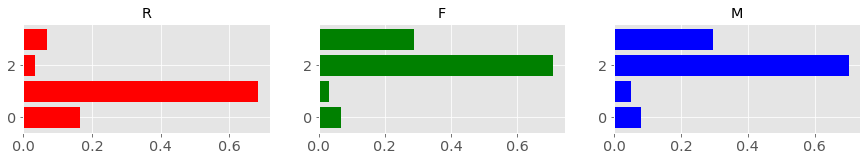

In [99]:
RFM=['R','F','M']
def dist_list(lst):
    plt.figure(figsize=[len(lst)*5,2])
    i = 1
    cl = ['rgbwymc'[c] for c in range(len('rgbwymc'))]
    for col in lst:
        ax = plt.subplot(1,len(lst),i)
        g = data.groupby('K_Cluster')
        x = g[col].mean().index
        y = g[col].mean().values
        ax.barh(x,y,color=cl[i-1])
        plt.title(col)
        i = i+1
        
dist_list(RFM)

# 4. Interpretasi cluster yang dihasilkan secara bisnis dan berikan rekomendasi yang sesuai dengan cluster yang dihasilkan

Langkah-langkah:


a. Tempelkan kembali label yang dihasilkan ke dataframe asal, dan keluarkan statistik
fitur dari setiap cluster

b. Deskripsikan secara kontekstual customer seperti apa yang ada di masing-masing
cluster

c. Berdasarkan cluster tersebut, berikan 1-2 rekomendasi strategi bisnis untuk
stakeholder!

Untuk mempermudah kamu, yuk lihat resource di bawah ini:

● Topic Unsupervised Learning - Clustering